# Python для визуализации данных

*Рогович Татьяна, ВШЭ*

## Упражнения

Первые три задания работаем с набором данных, который содержит всех новорожденных и их имена в CША. Последние два задания делаем на уже известном вам датасете про индийских женщин и диабет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

babies = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/babies%20names/babies_all.txt', index_col=0)
pima = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')

/Users/alexandersolomentsev/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
babies.tail()

,name,sex,number,year
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010
33837,Zzyzx,M,5,2010


In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет


In [4]:
years = babies.year.unique()
print(years)

[1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]


2) Какое имя в датасете находится по индексом 121?

In [5]:
print(babies.iloc[121, 0])

Ann


3) Cколько всего родилось детей по имени 'Aaron' за все время?



In [6]:
babies.number[babies.name == "Aaron"].sum()

527668

4) Насколько больше за все время родилось мальчиков чем девочек?

In [7]:
answer = babies.number[babies.sex == 'M'].sum() - babies.number[babies.sex == 'F'].sum()
if answer > 0:
    print(f'Мальчиков за все время родилось больше на {answer}.')
else:
    print(f'Мальчиков за все время родилось меньше на {-answer}.')

Мальчиков за все время родилось больше на 2422447.


5) Cколько мальчиков родилось в 2010?

In [8]:
babies.number[(babies['sex'] == 'M') & (babies['year'] == 2010)].sum()

1898382

6) Сколько в датасете девочек по имени John?

In [9]:
babies.number[(babies['sex'] == 'F') & (babies.name == 'John')].sum()

21578

## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: babies_girls и babies_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать __тренд__ рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


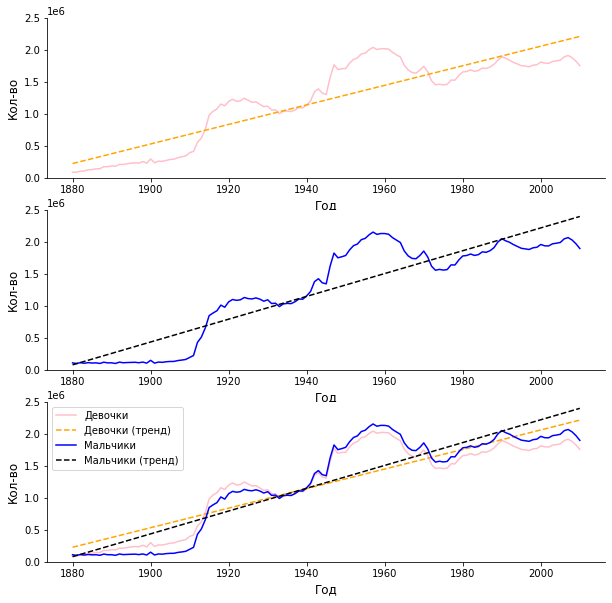

In [10]:
babies_girls = babies.copy()[babies.sex == 'F'].groupby('year').agg('sum')
babies_boys = babies.copy()[babies.sex == 'M'].groupby('year').agg('sum')

fig, ax = plt.subplots(3, 1, figsize=(10,10))

X = babies_boys.index

for i in range(3):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xlabel('Год', fontsize=12)
    ax[i].set_ylabel('Кол-во', fontsize=12)
    ax[i].set_ylim(0, 2500000)

# 1 graph – girls
ax[0].plot(babies_girls, c='pink')
girls_trend = np.polyfit(X, babies_girls.number, 1)
girls_trend_line = np.poly1d(girls_trend)
ax[0].plot(X,girls_trend_line(X),"r--", c='orange')

# 2 graph – boys
ax[1].plot(babies_boys, c='blue')
boys_trend = np.polyfit(X, babies_boys.number, 1)
boys_trend_line = np.poly1d(boys_trend)
ax[1].plot(X,boys_trend_line(X),"r--", c='black')


# 3 graph – all
ax[2].plot(babies_girls, c='pink')
ax[2].plot(X,girls_trend_line(X),"r--", c='orange')
ax[2].plot(babies_boys, c='blue')
ax[2].plot(X,boys_trend_line(X),"r--", c='black')
ax[2].legend(["Девочки", "Мальчики"])
ax[2].legend(["Девочки", "Девочки (тренд)", "Мальчики", "Мальчики (тренд)"])

__Описание__

На графике мы можем наблюдать возрастающую тенденцию рождения детей (мальчиков и девочек), при этом линия восходящего тренда рождаемости мальчиков оказалась более крутой. Это свидетельствует о том, что малчики рождаются чаще, чем девочки. Однако до 1935 года ежегодная рождаемость девочек былы выше. В период 1935-1950 рождаемость девочек и мальчиков была приблизительно равна. После 1950 года мальчиков рождалось больше, чем девочек

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Верхняя и правая границы графиков должны быть невидимы, каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
7. Опишите тренды в ячейке markdown под графиками.



Наиболее популярные имена за всю историю:
а) мальчики – James, John
б) девочки – Mary, Patricia


Text(0.5, 1.0, 'Имя: Patricia')

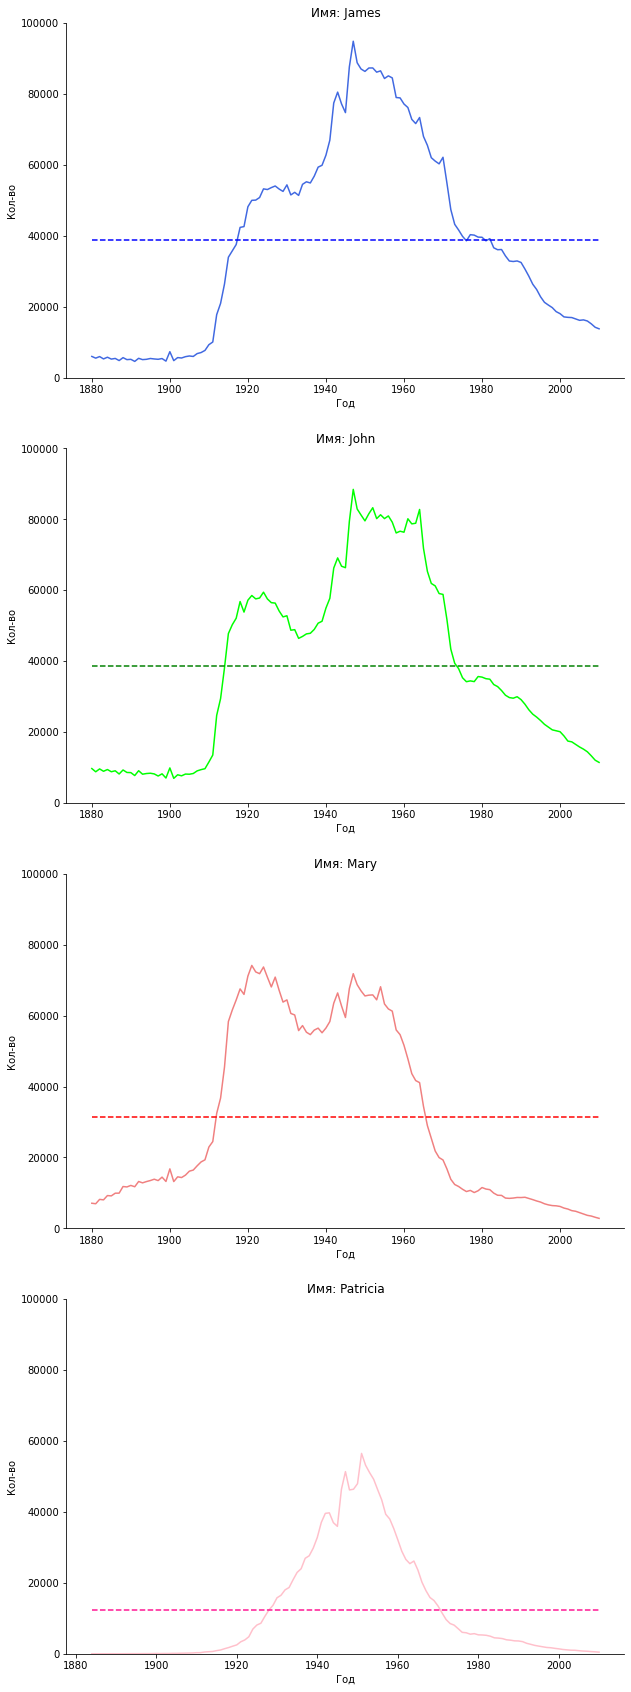

In [11]:
most_pop_name_boys = babies.copy()[babies.sex == 'M'].groupby('name').agg('sum')['number'].sort_values(ascending=False)
most_pop_name_girls = babies.copy()[babies.sex == 'F'].groupby('name').agg('sum')['number'].sort_values(ascending=False)
boys_names = ", ".join(list(most_pop_name_boys.index[:2]))
girls_names = ", ".join(list(most_pop_name_girls.index[:2]))

print(f'Наиболее популярные имена за всю историю:\nа) мальчики – {boys_names}\nб) девочки – {girls_names}')

babies_james = babies[babies.name == 'James'].groupby('year').agg('sum')
babies_john = babies[babies.name == 'John'].groupby('year').agg('sum')
babies_mary = babies[babies.name == 'Mary'].groupby('year').agg('sum')
babies_patricia = babies[babies.name == 'Patricia'].groupby('year').agg('sum')

fig, ax = plt.subplots(4,1, figsize=(10,30))

X = babies_james.index

for i in range(4):
    ax[i].set_xlabel('Год')
    ax[i].set_ylabel('Кол-во')
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_ylim(0, 100000)

# 1 graph – James
ax[0].plot(babies_james, c='royalblue')
james_trend = np.polyfit(X, babies_james.number, 0)
james_trend_line = np.poly1d(james_trend)
ax[0].plot(X, james_trend_line(X), 'r--', c='blue')
ax[0].set_title('Имя: James')


# 2 graph – John
ax[1].plot(babies_john, c='lime')
john_trend = np.polyfit(X, babies_john.number, 0)
john_trend_line = np.poly1d(john_trend)
ax[1].plot(X, john_trend_line(X), 'r--', c='green')
ax[1].set_title('Имя: John')


# 3 graph – Mary
ax[2].plot(babies_mary, c='lightcoral')
mary_trend = np.polyfit(X, babies_mary.number, 0)
mary_trend_line = np.poly1d(mary_trend)
ax[2].plot(X, mary_trend_line(X), 'r--', c='red')
ax[2].set_title('Имя: Mary')


# 4 graph – Patricia
ax[3].plot(babies_patricia, c='pink')
Y = babies_patricia.index
patricia_trend = np.polyfit(Y, babies_patricia.number, 0)
patricia_trend_line = np.poly1d(patricia_trend)
ax[3].plot(Y, patricia_trend_line(Y), 'r--', c='deeppink')
ax[3].set_title('Имя: Patricia')

__Описание__

Наибольшей популярностью представленные имена пользовались в период с 1940 по 1960 годы. Начиная с 1950 года популярность имен начала резко снижаться, достигнув к началу 20 века значений конца 19 века. Жители США называли мальчиков двумя самыми популярными мужскими именами чаще, чем самыми двумя популярными женскими.

## Задание 4

1. В оригинальном датафрейме babies создайте новую колонку - первая буква имени.
2. Выберете год из датасета. Сгруппируйте датасет, чтобы в нем в рядах были первые буквы, а в колонках - количество детей с такими именами. Сохраните три новых датафрейма для любых трех лет из выборки с такой группировкой.
3. Создайте фигуру matplotlib с 3 горизонтальными графиками один под другим.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. Постройте столбчатую диаграмму для каждого года. 
6. Сделайте вывод - какие первые буквы имени были самыми популярными в каждом году.

Text(0.5, 1.0, 'Год: 1910')

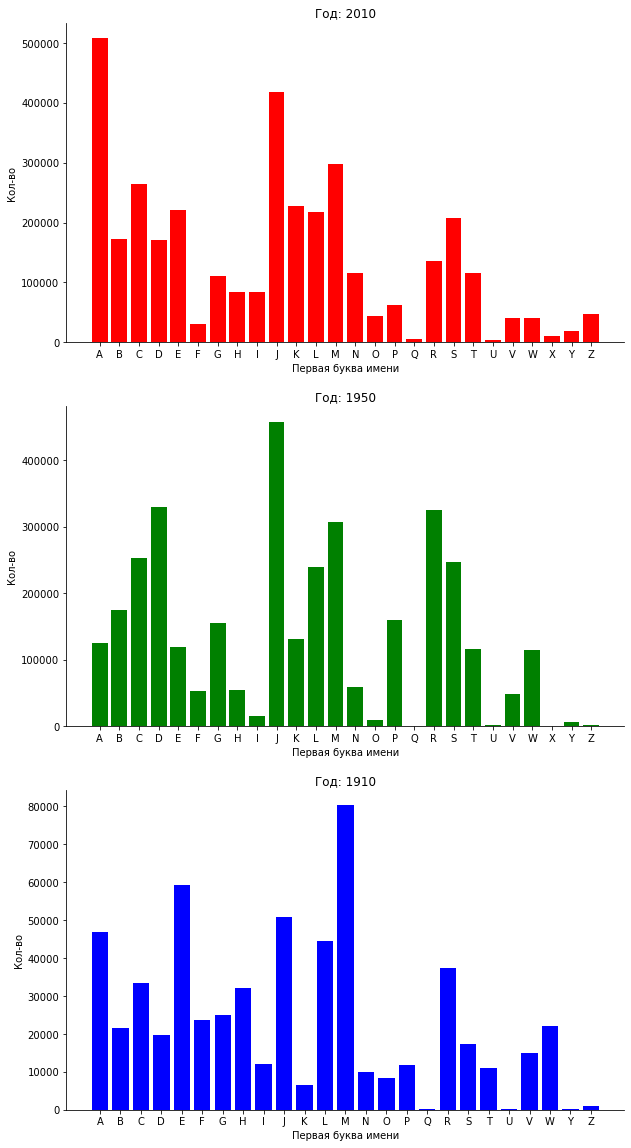

In [12]:
babies['letter'] = babies.name.apply(lambda x: str(x)[0])

letter_2010 = babies.copy()[babies.year == 2010].groupby('letter')['number'].agg('sum')
letter_1950 = babies.copy()[babies.year == 1950].groupby('letter')['number'].agg('sum')
letter_1910 = babies.copy()[babies.year == 1910].groupby('letter')['number'].agg('sum')

fig, ax = plt.subplots(3,1, figsize=(10,20))

for i in range(3):
    ax[i].set_xlabel('Первая буква имени')
    ax[i].set_ylabel('Кол-во')
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

# 1 graph – 2010
ax[0].bar(letter_2010.index, height=letter_2010, color='red')
ax[0].set_title('Год: 2010')


# 2 graph – 1950
ax[1].bar(letter_1950.index, height=letter_1950, color='green')
ax[1].set_title('Год: 1950')


# 3 graph – 1910
ax[2].bar(letter_1910.index, height=letter_1910, color='blue')
ax[2].set_title('Год: 1910')

__Описание__

* Наиболее популярной в 2010 году была буква "А".
* Наиболее популярной в 1950 году была буква "J".
* Наиболее популярной в 1910 году была буква "M".

## Задание 5

1. Создайте фигуру matplotlib с двумя осями координат (1 ряд, две колонки)
2. В первой оси координат для датасета pima постройте мультивариативный график рассеяния. Шкала x - уровень глюкозы, шкала y - давление, размер - возраст, цвет - наличие диабета (Class). 
3. Во второй оси координат постройте мультивариативный график, где по x - количество беременностей, y - BMI, цвет - наличие диабета. У этого графика принудительно приведите значения шкалы x к дискретным (с помощью метода оси координат, смотрели такой для леса).
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. По графикам вывод как эти переменные могут быть связаны с зависимой переменной (класс).


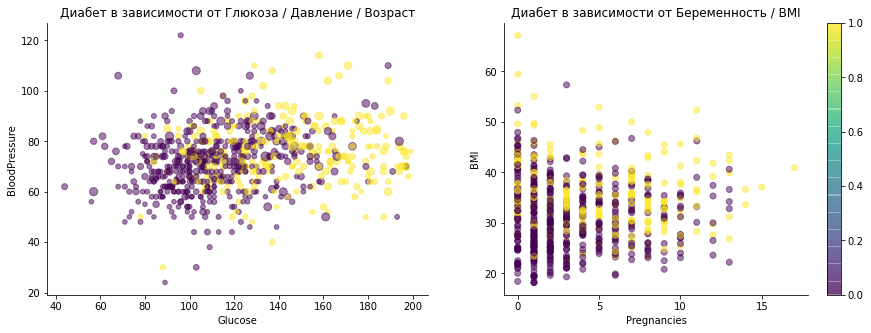

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

for i in range(2):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

# 1 graph
glu_blpre_age_diab = ax[0].scatter(pima.Glucose, pima.BloodPressure, s = pima.Age, alpha=0.5, c = pima.Class)
ax[0].set_xlabel('Glucose', fontsize = 10)
ax[0].set_ylabel('BloodPressure', fontsize = 10)
ax[0].set_title('Диабет в зависимости от Глюкоза / Давление / Возраст')


# 2 graph
preg_bmi_diab = ax[1].scatter(pima.Pregnancies, pima.BMI, alpha=0.5, c = pima.Class)
ax[1].locator_params(integer=True)
ax[1].set_xlabel('Pregnancies', fontsize = 10)
ax[1].set_ylabel('BMI', fontsize = 10)
ax[1].set_title('Диабет в зависимости от Беременность / BMI')

plt.colorbar(preg_bmi_diab)

__Описание__

1. **Левый график**

* Наличие диабета в меньшей степени зависит от возраста, так как наибольшие точки на графике не соответсвуют болеющим.
* Наличие диабета вероятно корреллирует с уровнем глюкозы. В среднем среди людей с высоким показателем уровня глюкозы, больше болеющих диабетом.
* Больные сахарным диабетом женщины и здоровые имеют примерно одинавый разброс показателей кровяного давления.

2. **Правый график**

* Наличие диабета вероятно корреллирует с количеством беременностей. Чем больше раз была беременна женщина, тем больше вероятность заболевания.
* Наличие диабета вероятно корреллирует с показателем BMI. Чем больше он выше, тем больше вероятность заболевания сахарным диабетом.

## Дополнительное задание

1. Создайте на основе датасета pima новый датасет: ряды - количество беременностей, колонки: mean_glucose (средний показатель уровня глюкозы для каждого количества беременностей), mean_bmi (аналогично для BMI). 
2. Создайте фигуру matplotlib с одним объектом.
2. Постройте для этого датасета совмещенную столбчатую диаграмму (для каждого значения переменной Pregnancies должно быть две колонки - mean_glucose, mean_bmi.
3. Верхняя и правая границы графика должны быть невидимы, график должен быть с заголовком, шкалы графика должны быть подписаны.
4. Сделайте вывод о связи количества беременностей и средних уровней глюкозы и индекса массы тела.

Text(0.5, 0, 'Кол-во беременстей')

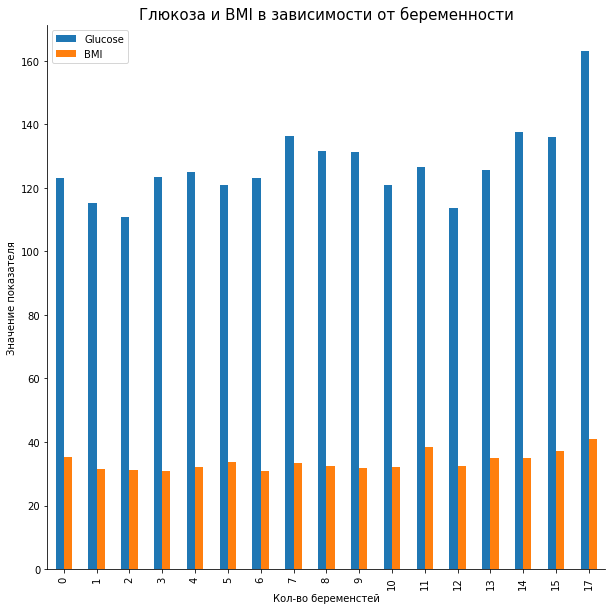

In [14]:
new_pima = pima.copy().groupby('Pregnancies').agg('mean')[['Glucose','BMI']]

fig, ax = plt.subplots(figsize=(10,10))

new_pima.plot(kind='bar', ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Глюкоза и BMI в зависимости от беременности', fontsize = 15)
ax.set_ylabel('Значение показателя', fontsize = 10)
ax.set_xlabel('Кол-во беременстей', fontsize = 10)

__Описание__

* В среднем по мере роста количества беременностей растет уровень глюкозы в крови.
* BMI в целом меньше зависит от количества беременностей, однако в данной выборке наибольшие показатели, если беременности не было совсем или их число больше 14.
* При этом, исходя из графика, вероятно наличие прямой зависимости между показателями уровня глюкозы и BMI.